# Image filtering and correction
## Tasks
* Substract from the original image its filtered copy
* Filter Lena from salt and pepper
* Make intensity correction by R(x, y, sigma) = log[I(x, y)] — log[I(x, y)*G(x, y, sigma)]
,where G - gaussian, sigma - coef of blurring, * - convolution
remapping of image from (-1,1) to (0,255) with I = 255*I + 127


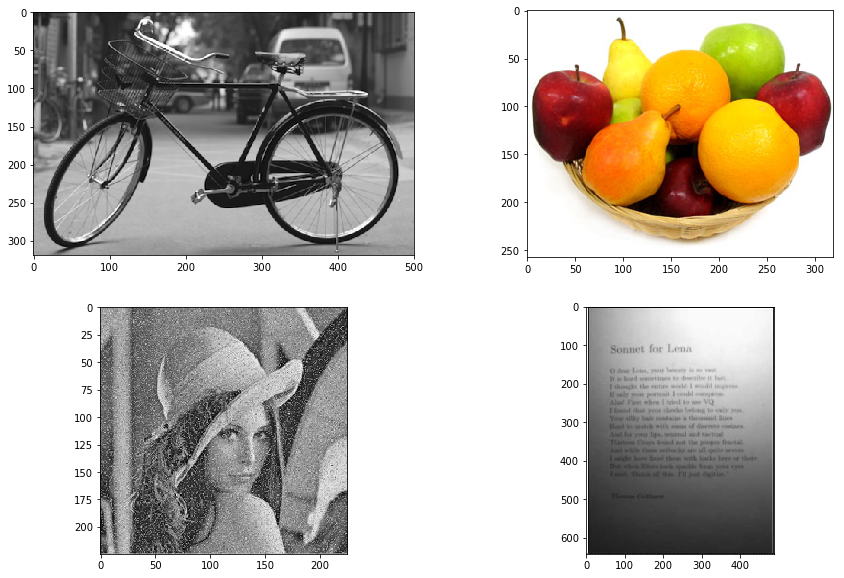

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
imbyc = img.imread('./bycicle.png')
imlen = img.imread('./lena.jpg')
imfru = img.imread('./unnamed.png')
imbook = img.imread('./book.png')
fig = plt.figure(figsize=(15,10))
plt.subplot(221)
plt.imshow(imbyc,cmap='gray')
plt.subplot(222)
plt.imshow(imfru)
plt.subplot(223)
plt.imshow(imlen)
plt.subplot(224)
plt.imshow(imbook)


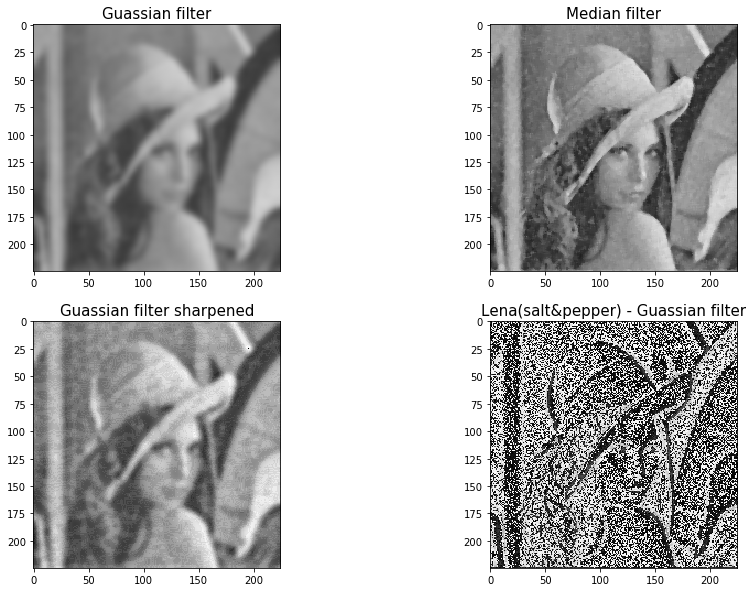

In [4]:
from PIL import Image
from scipy import ndimage
flt = ndimage.median_filter(imlen, 4)
blurred_f = ndimage.gaussian_filter(imlen, 3)
filter_blurred_l = ndimage.gaussian_filter(blurred_f, 1)
alpha = 15
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_l)
fig = plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.imshow(blurred_f, cmap='gray')
plt.title("Guassian filter", fontsize=15)
plt.subplot(222)
plt.imshow(flt, cmap='gray')
plt.title("Median filter", fontsize=15)
plt.subplot(223)
plt.imshow(sharpened, cmap='gray')
plt.title("Guassian filter sharpened", fontsize=15)
plt.subplot(224)
plt.imshow((imlen - blurred_f), cmap='gray')
plt.title("Lena(salt&pepper) - Guassian filter", fontsize=15)



0.728547
-0.827387


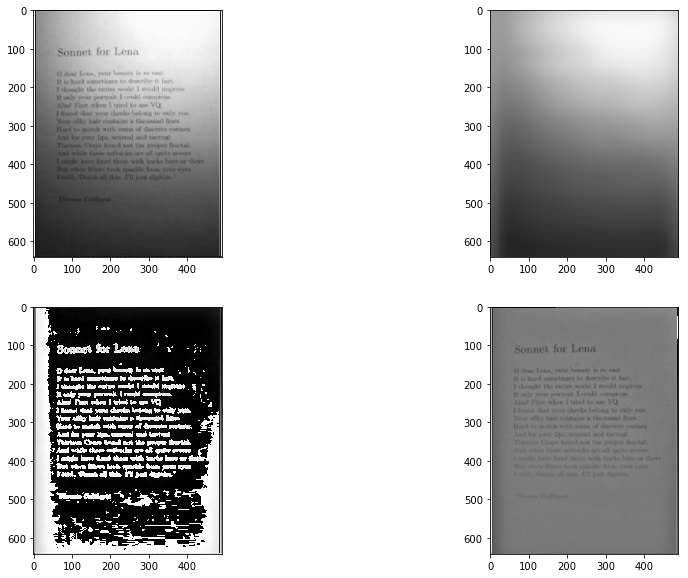

In [26]:
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt
im = ndimage.gaussian_filter(imbook, 20)
fig = plt.figure(figsize=(15,10))
imk = imbook - im
imkk = imk
maxi = imk.max()
mini = imk.min()
print(maxi)
print(mini)
imk = (imk + mini)/(maxi - mini)
plt.subplot(221)
plt.imshow(imbook, cmap='gray')
plt.subplot(222)
plt.imshow(im, cmap='gray')
plt.subplot(223)
plt.imshow(imkk, cmap='gray')
plt.subplot(224)
plt.imshow(imk, cmap='gray')
plt.show()